# Decision Trees

In this notebook, we are going to learn how to deploy a Decision tree model in python.
Here we are going to use the famous "Titanic" Dataset.

First, let's take a look at the dataset 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

### Import Dataset and EDA

In [4]:
data = 'titanic.csv'

df = pd.read_csv(data)

In [6]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Explore the target (Survived column)

In [8]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
df['Survived'].isnull().sum()

0

In [28]:
X = df[['Sex','Age','Cabin','Fare']] # For This Tutorial , we are going to stick to Sex,Age,Cabin and Fare

y = df['Survived']

### Feature Engineering

In [31]:
X_train.dtypes

Sex       object
Age      float64
Cabin     object
Fare     float64
dtype: object

In [32]:
# import category encoders

# Impute median Age for NA Age values
new_age_var = np.where(df["Age"].isnull(), # Logical check
                       28,                       # Value if check is true
                       df["Age"])     # Value if check is false

df["Age"] = new_age_var 

In [33]:
from sklearn import tree
from sklearn import preprocessing

# Initialize label encoder
label_encoder = preprocessing.LabelEncoder()

# Convert Sex variable to numeric
encoded_sex = label_encoder.fit_transform(df["Sex"])

encoded_cabin = label_encoder.fit_transform(df["Cabin"])

In [38]:
predictors = pd.DataFrame([encoded_sex,
                           encoded_cabin,
                           df["Age"],
                           df["Fare"]]).T

In [39]:
predictors

,0,1,2,3
0,1.0,147.0,22.0,7.2500
1,0.0,81.0,38.0,71.2833
2,0.0,147.0,26.0,7.9250
3,0.0,55.0,35.0,53.1000
4,1.0,147.0,35.0,8.0500
...,...,...,...,...
886,1.0,147.0,27.0,13.0000
887,0.0,30.0,19.0,30.0000
888,0.0,147.0,28.0,23.4500
889,1.0,60.0,26.0,30.0000


### Split data into training - testing

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(predictors, y, test_size = 0.12, random_state = 42)

In [41]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((784, 4), (107, 4))

### Decision Tree Classifier with criterion gini index

In [42]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0) #Descition Tree model


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [43]:
y_pred_gini = clf_gini.predict(X_test) #Prediction

In [44]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7944


Check for overfitting and underfitting

In [45]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7985
Test set score: 0.7944


### Visualize decision-trees

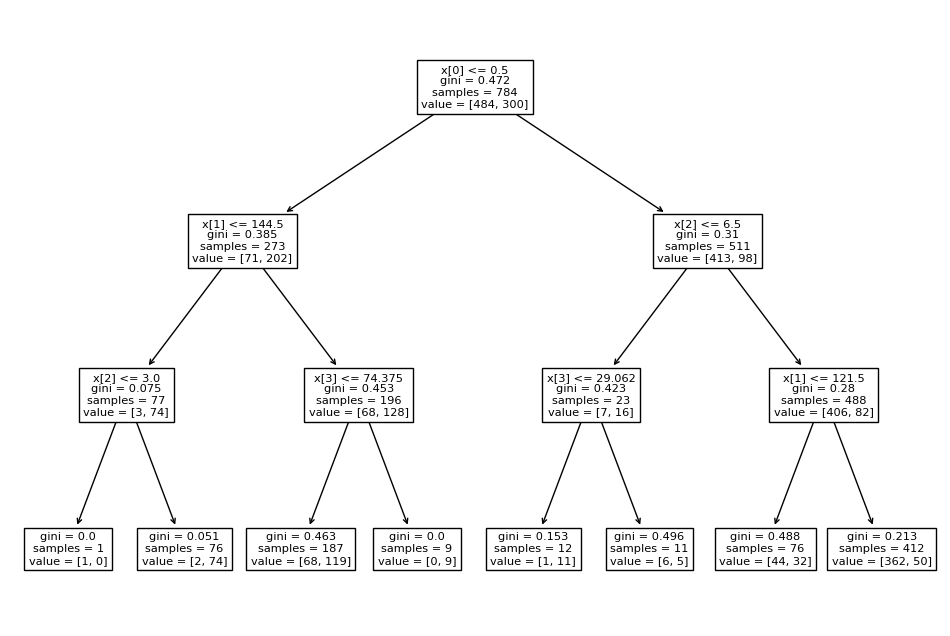

In [47]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) ;

###  Decision Tree Classifier with criterion entropy 

In [55]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [56]:
y_pred_en = clf_en.predict(X_test)

from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8131


We can see that this new model performs better compare to the Gini entropy model

> #### Excersice
> Can you tune the hyperparameters in the classifier to make the model more accurate?